# Lecture 1: Basic Python


![Python](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)

## Zhentao Shi

### Basics

-  Binary arithmetic operations `+`, `-`, `*` and `/` are performed element by element.逐个元素进行
-  Arithmetic operators: exponends are expressed with `**`, and `%` is the reminder. 指数和余数
-  Binary logical operations `&`, `|`, `!=`, `=`, `<`, `>`, `>=`, `<=`.

### Array and Matrix

* Python was not originally designed for scientific computing.

* To work with arrays and matrices, we need the package `numpy`

In [4]:
#Import the NumPy library
import numpy as np

# Import the Pandas library
import pandas as pd

#### Example

In [5]:
# Create an array
A = np.array([[1,2,3],[4,5,6]])
A


array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
A.shape

(2, 3)

In [7]:
# Create a matrix (2-dimensional array)
M = np.matrix([[1,2],[3,4]])
M

matrix([[1, 2],
        [3, 4]])

## Key Differences Between Python and R

* Python is row-major, while R is column-major.
* The indexing of Python is 0-based, while that of R is 1-based.

In [ ]:
#in R
#M <- matrix(c(1,2,3,4), ncol=2, nrow=2)
#会生成[1,3] [2,4]的矩阵

In [8]:
D = np.array([1,2,3,4,5,6]).reshape(2,3)
print(D)

[[1 2 3]
 [4 5 6]]


In [9]:
try:
    print(D + [1, 2])  # doesn't work in R直接会broadcasting
except ValueError as e:
    print(f"Error: {e}")


Error: operands could not be broadcast together with shapes (2,3) (2,) 


In [10]:
D + [[1],[2]] # broadcasting 
#in matlab, 需要手动把这个2*1的矩阵broadcasting成2*3的矩阵

array([[2, 3, 4],
       [6, 7, 8]])

In [11]:
F = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']
print(F)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'f', 'g']


In [12]:
F[2:5]

['c', 'd', 'e']

In [13]:
# the index rule in Python is more stringent.
D[0] # the first row

array([1, 2, 3])

In [14]:
D[0,:]

array([1, 2, 3])

In [15]:
D[:,0]

array([1, 4])

In [16]:
D[1,2]

6

In [17]:
# Matrix multiplication
result_mult = np.dot(A, D.T) #或者 result_mult = A @ D.T
print(result_mult)
A * D # element-wise multiplication 点对点的乘法

[[14 32]
 [32 77]]


In [18]:
# Matrix inverse
inverse_M = np.linalg.inv(M)
print(inverse_M)

[[-2.   1. ]
 [ 1.5 -0.5]]


In [19]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(A)
print("U matrix:\n", U)
print("Singular values:\n", S)
print("V matrix:\n", V)

Eigenvalues:
 [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
U matrix:
 [[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
Singular values:
 [9.508032   0.77286964]
V matrix:
 [[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


For further readings, please find a list of basic commands in the documentation of NumPy: 
https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

### OLS-Example
OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$\hat{\beta} = (X' X)^{-1} X'y.$
To conduct OLS estimation in Python, we literally translate the mathematical expression into code.

__Step 1__: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [20]:
# simulate data
import random
np.random.seed(111) # can be removed to allow the result to change
# set the parameters
n = 100
b0 = np.matrix([ [1],[2] ] )
# generate the data
e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

__Step 2:__ translate the formula to code

In [21]:
# OLS estimator
bhat = np.dot(np.linalg.inv(np.dot( X.T, X ) ), np.dot( X.T, y ) ) 
print(bhat)

[[0.99086531]
 [1.92203641]]


__Step 3 (additional):__ plot the regression graph with the scatter points and the regression line.
Further compare the regression line (black) with the true coefficient line (red).

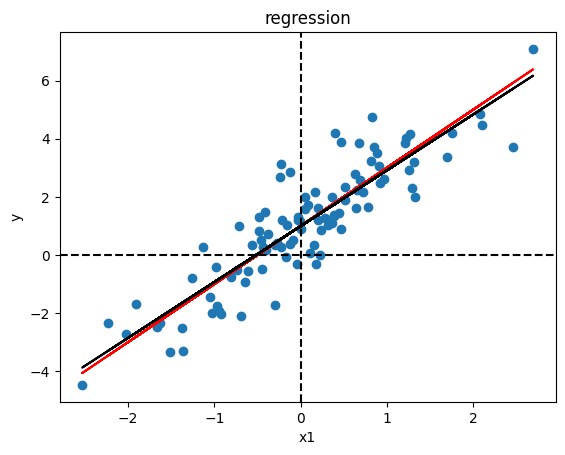

In [22]:
# Import MathPlotLib
import matplotlib.pyplot as plt
X1 = X[:, 1]
plt.plot(X1, y, 'o')
plt.plot(X1, np.dot(X, b0), color='red', linestyle='-')
plt.plot(X1, np.dot(X, bhat), color='black', linestyle='-')
plt.title('regression')
plt.xlabel('x1')
plt.ylabel('y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

__Step 4:__ In econometrics we are often interested in hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.

In [23]:
# Import Math

# Calculate the t-value
bhat2 = bhat.item(1) # item( ) is a new function I learn today

e_hat = y - np.dot(X, bhat)
sigma_hat_square = np.dot(e_hat.T, e_hat).item(0) / (n-2)

Sigma_B = np.linalg.inv(np.dot(X.T, X)) * sigma_hat_square
t_value_2 = (bhat2 - b0[1, 0]) / np.sqrt(Sigma_B[1, 1])
print(t_value_2)

-0.7771772903170151


### Package/Module/Library

* Python has numerous useful packages/modules/libraries. 
* Install the targeted package into the environment.



### Input and Output

To read and write csv files in Python, use the pandas library.
`!pip install package_name`

#### Example:

In [24]:
import pandas as pd
sample_data = pd.read_csv('data_example/AJR.csv')
sample_data.head()

,shortnam,logpgp95,loghjypl,avexpr,lat_abst,logem4,malfal94,yellow,leb95,imr95,meantemp,lt100km,euro1900,democ1,cons1,democ00a,cons00a
0,AGO,7.770645,-3.411248,5.363636,0.136667,5.634789,0.95000,1,46.49,125.0,22.94133,0.118758,8.0,0.0,3.0,0.0,1.0
1,ARG,9.133459,-0.872274,6.386364,0.377778,4.232656,0.00000,0,72.89,21.8,17.10000,0.123089,60.0,1.0,1.0,3.0,3.0
2,AUS,9.897972,-0.170788,9.318182,0.300000,2.145931,0.00000,1,78.25,5.6,20.90000,0.198958,98.0,10.0,7.0,10.0,7.0
3,BFA,6.845880,-3.540459,4.454545,0.144445,5.634789,0.95000,1,44.39,98.8,28.10000,0.000000,0.0,0.0,3.0,0.0,1.0
4,BGD,6.877296,-2.063568,5.136364,0.266667,4.268438,0.12008,1,58.13,78.8,25.68621,0.401598,0.0,8.0,7.0,0.0,1.0


In [25]:
sample_data = sample_data.dropna()

# write the sample_data to a csv file
sample_data.to_csv('data_example/AJR_from_py.csv', index = False)


### Statistics

* The package `SciPy` is for statistics. 
* Commonly used probability distributions in `SciPy.stats`


##### Example:

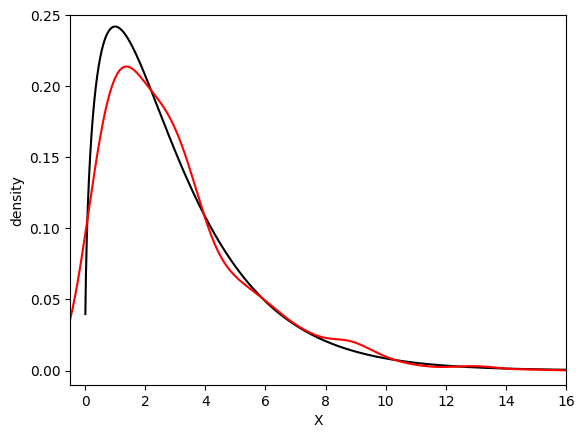

In [26]:
# Import Packages

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


x = np.linspace(0.01, 16, num = 1600)
y = stats.chi2.pdf(x, 3)
z = stats.chi2.rvs(3, size = 1000)

plt.plot(x, y, linestyle = '-', color = 'black')
sns.kdeplot(z, color = 'red')
plt.xlim(-0.5, 16)
plt.ylim(-0.01, 0.25)
plt.xlabel('X')
plt.ylabel('density')
plt.show()

In [27]:
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(len([i for i in z if i > crit]) / len(z))

0.053


### User-defined function

The format of a user-defined function in Python is

```            
def function_name(input):

    expressions 
    
    return output
```

##### Example:

If the central limit theorem is applicable, then
we can calculate the 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.
It is an easy job.

In [28]:
#construct confidence interval

def CI(x):
    #x is a vector of random variables
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x)
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}
    # return a tuple

### Flow Control

* `if` is used for choice
* `for` or `while` is used for loops.

**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [29]:
import datetime
from scipy import stats

Rep = 1000
sample_size = 100
capture = [0] * Rep


for i in range(Rep):
    mu = 2
    x = stats.poisson.rvs(mu, size = sample_size)
    bounds = CI(x)
    if (bounds['lower'] <= mu and mu <= bounds['upper']):
        capture[i] = 1
    

print(np.mean(capture))

0.949


### Statistical Model

* Statistical models are formulated as `y~x`
* In the package `scikit-learn`, we run OLS using `LinearRegression()`

In [30]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
T = 30
p = 1
b0 = [[1.], [2.]]

# Generate data
x = stats.norm.rvs(size=[T, p])
x = sm.add_constant(x)  # Add intercept
y = np.dot(x, b0) + stats.norm.rvs(size=[T, 1])

# Linear model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     177.1
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.25e-13
Time:                        05:55:02   Log-Likelihood:                -40.592
No. Observations:                  30   AIC:                             85.18
Df Residuals:                      28   BIC:                             87.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5858      0.177      3.308      0.0

## Display

* `result` object is a list containing the regression results. 
  * Estimated coefficients, 
  * t-stat
  * F-stat
  * R-sqaured.

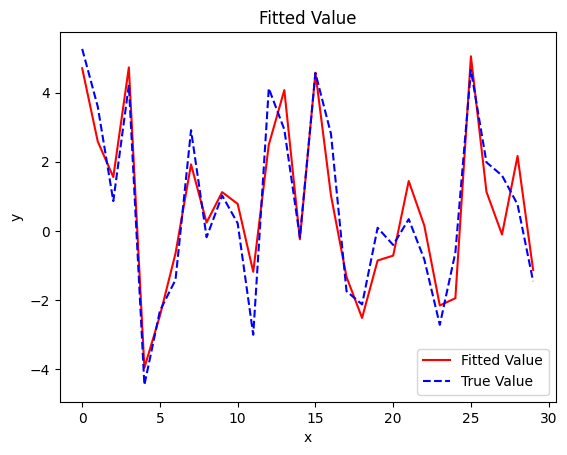

In [31]:
plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()